In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,...,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


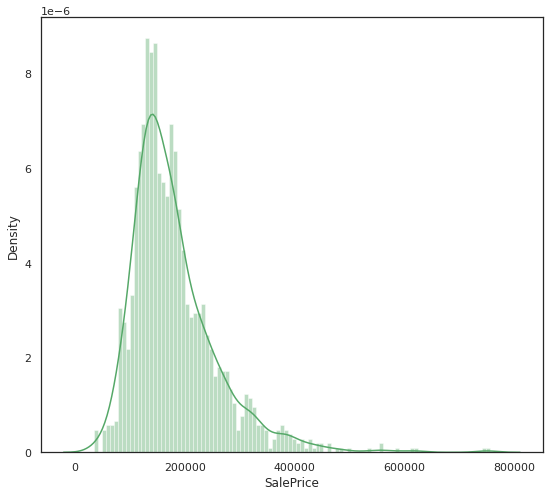

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
miss_val = df.isna().sum()
miss_val

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [ ]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [ ]:
df['LotFrontage'].fillna(0.0, inplace=True)

In [ ]:
miss_val = df.isna().sum()
miss_val

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [ ]:
dataset_numerical_features= df.select_dtypes(include = ['float64', 'int64'])

dataset_numerical_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
dataset_numerical_features = dataset_numerical_features.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
dataset_numerical_features =dataset_numerical_features[abs(dataset_numerical_features) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(dataset_numerical_features), dataset_numerical_features))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [ ]:
dataset_numerical_features = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(dataset_numerical_features), dataset_numerical_features))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


# **Correlation**

Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

Plot the numerical features and see which ones have very few or explainable outliers
Remove the outliers from these features and see which one can have a good correlation without their outliers
Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the SalePrice.

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

# **Conclusion**
There may be some patterns I wasn't able to identify due to my lack of expertise

Some values such as GarageCars -> SalePrice or Fireplaces -> SalePrice shows a particular pattern with verticals lines roughly meaning that they are discrete variables with a short range but I don't know if they need some sort of "special treatment".

In [ ]:
dataset_numerical_features =['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual','SalePrice']

In [ ]:
numerical_features_datset = df[dataset_numerical_features]

In [ ]:
numerical_features_datset.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,GarageArea,TotalBsmtSF,GarageCars,2ndFlrSF,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,548,856,2,854,1710,7,208500
1,1976,1976,6,2,1262,460,1262,2,0,1262,6,181500
2,2002,2001,6,2,920,608,920,2,866,1786,7,223500
3,1970,1915,7,1,961,642,756,3,756,1717,7,140000
4,2000,2000,9,2,1145,836,1145,3,1053,2198,8,250000


In [ ]:
numerical_features_datset.isnull().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
GarageArea      0
TotalBsmtSF     0
GarageCars      0
2ndFlrSF        0
GrLivArea       0
OverallQual     0
SalePrice       0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(numerical_features_datset)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# get scaled data 
dataset_scaled = pd.DataFrame(min_max_scaler.transform(numerical_features_datset))

# assign column labels
dataset_scaled.columns = dataset_numerical_features

In [ ]:
dataset_scaled.describe()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,GarageArea,TotalBsmtSF,GarageCars,2ndFlrSF,GrLivArea,OverallQual,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.581096,0.719332,0.376484,0.521689,0.190139,0.333554,0.173065,0.441781,0.168035,0.222582,0.566591,0.202779
std,0.344090,0.218862,0.135449,0.183639,0.088708,0.150779,0.071801,0.186829,0.211394,0.098998,0.153666,0.110321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283333,0.594203,0.250000,0.333333,0.125746,0.235896,0.130237,0.250000,0.000000,0.149868,0.444444,0.132030
50%,0.733333,0.731884,0.333333,0.666667,0.172786,0.338505,0.162275,0.500000,0.000000,0.212886,0.555556,0.177892
75%,0.900000,0.927536,0.416667,0.666667,0.242600,0.406206,0.212480,0.500000,0.352542,0.271807,0.666667,0.248715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

# import PCA from decomposition
from sklearn.decomposition import PCA

# create the PCA object to use to fit the given data
pca = PCA()

# fit the PCA with the given cleaned-up data
pca.fit(dataset_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#Principal axes in feature space, representing the directions of maximum variance in the data.
print(pca.components_)

[[-6.81881354e-01 -3.71910299e-01 -1.33949899e-01 -2.83095373e-01
  -8.69334122e-02 -2.21478321e-01 -7.65764196e-02 -2.98534838e-01
  -1.48365096e-01 -1.27548753e-01 -2.70058131e-01 -1.89276624e-01]
 [-4.59762819e-01 -1.92916829e-01  3.67344848e-01  2.81392613e-01
   2.42413410e-02  1.18544702e-01 -2.37238033e-03  1.53649367e-01
   6.30961023e-01  2.69685945e-01  1.16326909e-01  1.21031776e-01]
 [ 4.97327532e-01 -3.03244800e-01  6.15086630e-02 -2.81683035e-03
  -1.98761432e-01 -3.85406807e-01 -1.55564230e-01 -4.50780163e-01
   4.60642579e-01  2.05388368e-02 -1.26457357e-01 -1.13420785e-01]
 [ 2.61525979e-01 -7.33082353e-01  1.09399446e-01 -3.70504185e-01
   1.47315536e-01  3.14700700e-01  7.20317225e-02  3.05630400e-01
  -1.18724820e-01  8.15534397e-02 -2.60763140e-03  6.97322139e-02]
 [ 1.21250531e-02 -2.43068476e-01  2.64346748e-01  4.79441254e-01
   3.93787323e-01 -2.36349447e-01  2.38294655e-01 -3.51003112e-01
  -4.35825237e-01  1.62123891e-01  1.28277127e-01  1.32014092e-01]
 [-7.

In [ ]:

# check the shape 
print(pca.components_.shape)

(12, 12)


In [ ]:
print(type(pca.components_))

<class 'numpy.ndarray'>


In [ ]:
print(pca.explained_variance_)

[1.96788459e-01 6.65002824e-02 4.55354434e-02 2.18683865e-02
 1.86597214e-02 1.24429536e-02 7.56955136e-03 3.86941976e-03
 2.85405616e-03 2.09394823e-03 1.07882544e-03 4.29544568e-05]


In [ ]:
print(len(pca.explained_variance_))

12


In [ ]:
print(pca.singular_values_)

[16.94444929  9.85007168  8.15084118  5.6485375   5.21771344  4.2607827
  3.32324772  2.37602261  2.0406048   1.74787599  1.25459408  0.25034087]


In [ ]:
print(pca.mean_)

[0.58109589 0.71933194 0.37648402 0.5216895  0.19013922 0.3335544
 0.17306538 0.44178082 0.16803509 0.22258171 0.56659056 0.20277905]


In [ ]:
print(pca.noise_variance_)

0.0


In [ ]:
principal_components = pca.fit_transform(dataset_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(1460, 12)


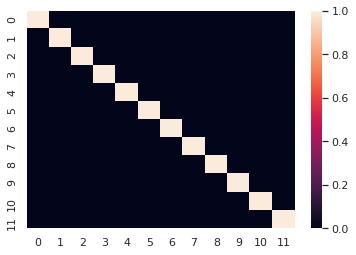

In [ ]:
import seaborn as sns

sns.heatmap(principal_components_df.corr())

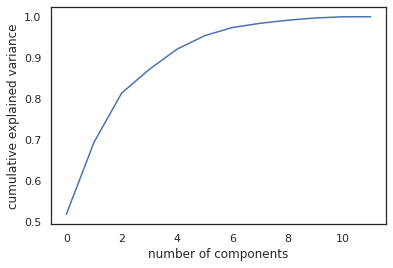

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca_low_dim = PCA(n_components = 3)

In [ ]:
pca_low_dim.fit(dataset_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(dataset_scaled.shape)

# transformed components
print(pca_low_dim.transform(dataset_scaled).shape)

(1460, 12)
(1460, 3)


In [ ]:
print(pca_low_dim.explained_variance_)

[0.19678846 0.06650028 0.04553544]


In [ ]:

print(pca_low_dim.explained_variance_.sum())

0.3088241849152351


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 

train, val = train_test_split(numerical_features_datset , test_size=0.25)

In [ ]:
#considering only the highly correlated features for training and validation
numerical_features_datset_x = numerical_features_datset.drop(['SalePrice'], axis = 1)
numerical_features_datset_y = numerical_features_datset['SalePrice'] 
test_x = val.drop(['SalePrice'], axis = 1)
test_y = val['SalePrice']


In [ ]:
print('Dimension of df_num_x dataframe:',numerical_features_datset_x.shape)
print('Dimension of df_num_y dataframe:',numerical_features_datset_y.shape)
print('Dimension of test_x dataframe:',test_x.shape)
print('Dimension of test_y dataframe:',test_y.shape)


Dimension of df_num_x dataframe: (1460, 11)
Dimension of df_num_y dataframe: (1460,)
Dimension of test_x dataframe: (365, 11)
Dimension of test_y dataframe: (365,)


In [ ]:
ln_reg = LinearRegression()
ln_reg.fit(numerical_features_datset_x, numerical_features_datset_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

df_pred = ln_reg.predict(numerical_features_datset_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, numerical_features_datset_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, numerical_features_datset_y))
print('Root_mean_Squared Score of linear regression:', r2_score(df_pred, numerical_features_datset_y))


Mean Absolute Error of linear regression: 23782.176572135315
Mean Square Error of linear regression: 1424296795.105276
Root_mean_Squared Score of linear regression: 0.7082848561156339


In [ ]:
#final prediction on test data
predict_test = ln_reg.predict(test_x)

#Create Sample Submission file 
test_y = pd.DataFrame(test_y)
test_y['Predicted'] = predict_test

test_y

,SalePrice,Predicted
1399,137450,157316.166354
1028,105000,118153.002606
572,224500,218412.120583
240,262500,256751.057568
1228,367294,309619.688102
...,...,...
594,110000,113920.669533
115,176000,173836.990130
254,145000,137588.028742
1378,83000,120567.521195


In [ ]:
#final prediction on test data
predict_test = ln_reg.predict(numerical_features_datset_x)

#Create Sample Submission file 
df_num_y = pd.DataFrame(numerical_features_datset_y)
df_num_y['Predicted'] = predict_test

df_num_y

,SalePrice,Predicted
0,208500,214898.216750
1,181500,169144.126967
2,223500,221008.192602
3,140000,200499.950872
4,250000,282577.302438
...,...,...
1455,175000,191960.576932
1456,210000,232904.691716
1457,266500,228554.630096
1458,142125,126378.351819
